In [1]:
from sentence_transformers import SentenceTransformer
from sklearn.cluster import KMeans
import pandas as pd

embedder = SentenceTransformer('distilbert-base-nli-stsb-mean-tokens')

In [2]:
e1 = embedder.encode(["I am a man."])

In [14]:
e2 = embedder.encode(["I am a man. You are a woman."])
e2_1 = embedder.encode(["I am a man. You are a woman. "])

In [10]:
e1.reshape(-1).shape

(768,)

In [15]:
e2 == e2_1

array([[ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
      

In [16]:
# Corpus with example sentences
corpus = ['A man is eating food.',
          'A man is eating a piece of bread.',
          'A man is eating pasta.',
          'The girl is carrying a baby.',
          'The baby is carried by the woman',
          'A man is riding a horse.',
          'A man is riding a white horse on an enclosed ground.',
          'A monkey is playing drums.',
          'Someone in a gorilla costume is playing a set of drums.',
          'A cheetah is running behind its prey.',
          'A cheetah chases prey on across a field.'
          ]
corpus_embeddings = embedder.encode(corpus)

# Perform kmean clustering
num_clusters = 5
clustering_model = KMeans(n_clusters=num_clusters)
clustering_model.fit(corpus_embeddings)
cluster_assignment = clustering_model.labels_

clustered_sentences = [[] for i in range(num_clusters)]
for sentence_id, cluster_id in enumerate(cluster_assignment):
    clustered_sentences[cluster_id].append(corpus[sentence_id])

for i, cluster in enumerate(clustered_sentences):
    print("Cluster ", i+1)
    print(cluster)
    print("")

Cluster  1
['The girl is carrying a baby.', 'The baby is carried by the woman']

Cluster  2
['A man is eating food.', 'A man is eating a piece of bread.', 'A man is eating pasta.']

Cluster  3
['A man is riding a horse.', 'A man is riding a white horse on an enclosed ground.']

Cluster  4
['A monkey is playing drums.', 'Someone in a gorilla costume is playing a set of drums.']

Cluster  5
['A cheetah is running behind its prey.', 'A cheetah chases prey on across a field.']



In [1]:
import pandas as pd

In [2]:
df_scopus = pd.read_csv("scopus/scopus_math+comp_top5perc_1901-1906.csv")
# df_scopus = df_scopus[df_scopus["Abstract"] != "[No abstract available]"]

In [3]:
target_scopus = df_scopus.sample(n=100)
list_abs = list(target_scopus["Abstract"])
list_abs = list(map(lambda abs: abs.split("©")[0], list_abs))

list_titles = list(target_scopus["Title"])

In [4]:
corpus_embeddings = embedder.encode(list_abs)
# Perform kmean clustering
num_clusters = 5
clustering_model = KMeans(n_clusters=num_clusters)
cluster_assignment = clustering_model.fit_predict(corpus_embeddings)

NameError: name 'embedder' is not defined

In [35]:
cluster_assignment

array([2, 1, 2, 2, 1, 1, 1, 1, 4, 4, 2, 1, 1, 1, 4, 1, 4, 1, 1, 1, 2, 1,
       1, 2, 2, 2, 4, 1, 1, 4, 4, 3, 2, 2, 4, 3, 3, 2, 1, 1, 4, 1, 3, 4,
       4, 3, 1, 1, 1, 1, 4, 2, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 2, 4, 4, 2,
       1, 1, 1, 4, 4, 4, 1, 1, 1, 2, 1, 1, 2, 4, 4, 1, 0, 1, 4, 2, 4, 4,
       2, 0, 1, 4, 4, 0, 3, 4, 1, 1, 0, 4], dtype=int32)

In [36]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
corpus_pca = pca.fit_transform(corpus_embeddings)
# corpus_label = pca.predict(corpus_embeddings)

clustered_abs = [[] for i in range(num_clusters)]
clustered_embeddings = [[] for i in range(num_clusters)]
clustered_pca = [[] for i in range(num_clusters)]
clustered_titles = [[] for i in range(num_clusters)]

for sentence_id, cluster_id in enumerate(cluster_assignment):
    clustered_abs[cluster_id].append(list_abs[sentence_id])
    clustered_embeddings[cluster_id].append(corpus_embeddings[sentence_id])
    clustered_pca[cluster_id].append(corpus_pca[sentence_id])
    clustered_titles[cluster_id].append(list_titles[sentence_id])

for i, cluster in enumerate(clustered_titles):
    print("Cluster ", i+1)
    print(cluster)
    print("")

Cluster  1
['Intestinal Microbiota in Early Life and Its Implications on Childhood Health', 'gFACs: Gene Filtering, Analysis, and Conversion to Unify Genome Annotations Across Alignment and Gene Prediction Frameworks', 'A generic deep convolutional neural network framework for prediction of receptor-ligand interactions-NetPhosPan: Application to kinase phosphorylation prediction', 'Near-optimal lower bounds on the threshold degree and sign-rank of AC0']

Cluster  2
['Image-text dual neural network with decision strategy for small-sample image classification', 'LPTD: Achieving lightweight and privacy-preserving truth discovery in CIoT', 'Direction of Arrival Estimation for Reverberant Speech Based on Enhanced Decomposition of the Direct Sound', 'Adaptive fuzzy decentralized control for a class of MIMO large-scale nonlinear state delay systems with unmodeled dynamics subject to unknown input saturation and infinite number of actuator failures', 'A Data-Centric Cognitive Gateway with Dist

In [37]:
clustering_model.labels_ # c=

array([2, 1, 2, 2, 1, 1, 1, 1, 4, 4, 2, 1, 1, 1, 4, 1, 4, 1, 1, 1, 2, 1,
       1, 2, 2, 2, 4, 1, 1, 4, 4, 3, 2, 2, 4, 3, 3, 2, 1, 1, 4, 1, 3, 4,
       4, 3, 1, 1, 1, 1, 4, 2, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 2, 4, 4, 2,
       1, 1, 1, 4, 4, 4, 1, 1, 1, 2, 1, 1, 2, 4, 4, 1, 0, 1, 4, 2, 4, 4,
       2, 0, 1, 4, 4, 0, 3, 4, 1, 1, 0, 4], dtype=int32)

In [38]:
# clustered_pca
corpus_pca

array([[-2.18078092e-01,  3.57382369e+00],
       [ 6.31221235e-01, -1.41943789e+00],
       [-4.58765602e+00,  2.50443053e+00],
       [-1.19893515e+00,  6.78967178e-01],
       [ 1.85429049e+00, -2.07495522e+00],
       [-3.51731062e+00,  2.97986060e-01],
       [-2.34024596e+00, -1.74819016e+00],
       [-5.48442975e-02, -1.98884642e+00],
       [ 4.20421076e+00, -1.15638506e+00],
       [ 4.04424286e+00,  9.03796971e-01],
       [-2.90055633e+00,  1.40583026e+00],
       [-3.30561489e-01,  3.08043170e+00],
       [-1.42019463e+00,  4.28838402e-01],
       [-1.58229721e+00, -1.78978240e+00],
       [ 1.09625614e+00,  3.75627786e-01],
       [-4.40512896e-01, -3.91158819e-01],
       [ 2.09296250e+00, -8.16160202e-01],
       [-2.89975953e+00, -7.74886489e-01],
       [ 5.85348671e-03, -5.11567771e-01],
       [-2.53141212e+00, -3.33691740e+00],
       [-8.31278741e-01,  3.26351261e+00],
       [-7.96885014e-01,  1.51522458e+00],
       [-2.89926195e+00, -5.78845739e-01],
       [-2.

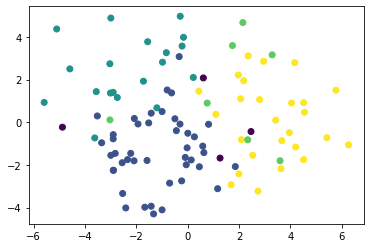

In [39]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(corpus_pca[:, 0], corpus_pca[:, 1], c=clustering_model.labels_)
plt.show()

임베딩을 KMeans클러스터 후 PCA 변환을 plot해도 의미를 알 기 힘듦... 클러스터 간 겹치는 부분이 많네... 당연한가? <- 임베딩을 PCA 변환 후 Kmeans클러스터 플롯하면 더 의미가 보이겠지? 그것도 당연하네. 바운더리가 확실하니

클러스터 수를 줄여서 적당한 바운더리를 찾자!

In [1]:
import numpy as np
import pandas as pd
from db_handler import DBHandler
from matplotlib import pyplot as plt
from scipy import stats
from datetime import datetime, timedelta
from calendar import monthrange
%matplotlib inline

from scopus_handler import ScopusHandler

df1 = pd.read_csv("/home/hweem/git/mastersdegree/ytcrawl/customs/scopus/scopus_math+comp_top5perc_1901-1906.csv")
df1_sources = pd.read_csv("scopus/source-results-math_cs-citescore-2018.csv", header=0)
# df2 = pd.read_csv("/home/hweem/git/mastersdegree/ytcrawl/customs/scopus/scopus_math+comp_top5perc_1701-1706.csv")

df3 = pd.read_csv("/home/hweem/git/mastersdegree/ytcrawl/customs/scopus/scopus_math+comp_top5perc_1401-1406.csv")
df3_sources = pd.read_csv("scopus/source-results-math_cs-citescore-2013.csv", header=0)
# df3_sources = pd.read_csv("scopus/")

# df1 = pd.read_csv("/home/hweem/git/mastersdegree/ytcrawl/customs/scopus/scopus_life+earch_top60_1901-1906.csv")
# df2 = pd.read_csv("/home/hweem/git/mastersdegree/ytcrawl/customs/scopus/scopus_math+comp_top5perc_1701-1706.csv")
# df3 = pd.read_csv("/home/hweem/git/mastersdegree/ytcrawl/customs/scopus/scopus_life+earch_top60_1401-1406.csv")
print(len(df1), len(df3))

df1 = df1.drop_duplicates(subset=["DOI"])
# df2 = df2.drop_duplicates(subset=["DOI"])
df3 = df3.drop_duplicates(subset=["DOI"])
print(len(df1), len(df3))

14533 9598
14330 9336


In [2]:
scopus_2019_life = ScopusHandler(df1, df1_sources, "scopus_videos_2019_comp")
scopus_2014_comp = ScopusHandler(df3, df3_sources, "scopus_videos_2014_comp")

[+]Duplicates have been dropped from df_scopus.	Before: 14330	After: 14330
[+]Duplicates have been dropped from df_scopus.	Before: 9336	After: 9336


[+]Assigning new embedder instance.
	Command set: SELECT `idx`, `videoId`, `idx_paper`, `publishedAt` FROM `scopus_videos_2019_comp`
	sql: SELECT `idx`, `videoId`, `idx_paper`, `publishedAt` FROM `scopus_videos_2019_comp`;
# Total DOIs: 14330	# DOIs w/ videos: 61	Ratio: 0.004
# Total videos: 79	# Target videos: 77	Ratio: 0.975
# Total subjects: 46	# subjects w/ videos: 22	Ratio: 0.478
# Total journals: 133	# journals w/ videos: 36	Ratio: 0.271
# Total elements in plot: 61
Cluster 1(N=15)
['Assessing binge-watching behaviors: Development and validation of the “Watching TV Series Motives” and “Binge-watching Engagement and Symptoms” questionnaires', 'Smartphones reduce smiles between strangers', 'A manifesto for future generation cloud computing: Research directions for the next decade', 'Social media data and post-disaster recovery', 'The Internet and Facebook Usage on Academic Distraction of College Students', 'Applying learning analytics to students’ interaction in business simulation

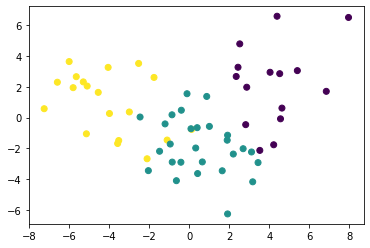

In [8]:
scopus_2019_life.cluster_scopus(target_column="Abstract", num_clusters=3)

	Command set: SELECT `idx`, `videoId`, `idx_paper`, `publishedAt` FROM `scopus_videos_2019_comp`
	sql: SELECT `idx`, `videoId`, `idx_paper`, `publishedAt` FROM `scopus_videos_2019_comp`;
# Total DOIs: 14330	# DOIs w/ videos: 61	Ratio: 0.004
# Total videos: 79	# Target videos: 77	Ratio: 0.975
# Total subjects: 46	# subjects w/ videos: 22	Ratio: 0.478
# Total journals: 133	# journals w/ videos: 36	Ratio: 0.271
# Total elements in plot: 61
Cluster 1(N=15)
['Assessing binge-watching behaviors: Development and validation of the “Watching TV Series Motives” and “Binge-watching Engagement and Symptoms” questionnaires', 'Smartphones reduce smiles between strangers', 'A manifesto for future generation cloud computing: Research directions for the next decade', 'Social media data and post-disaster recovery', 'The Internet and Facebook Usage on Academic Distraction of College Students', 'Applying learning analytics to students’ interaction in business simulation games. The usefulness of learning a

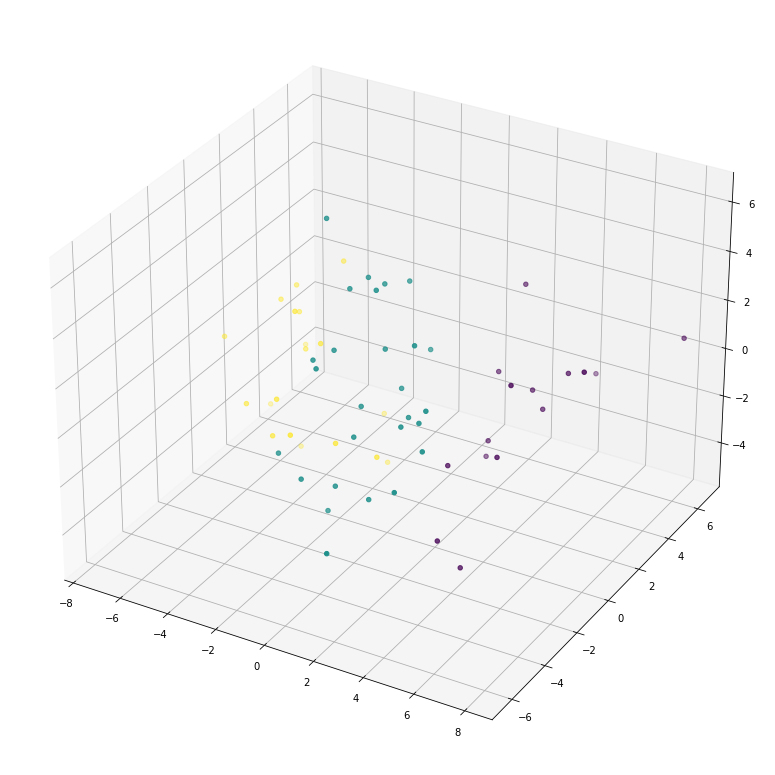

In [9]:
scopus_2019_life.cluster_scopus(target_column="Abstract", train_kmeans=False, pca_components=3)

In [10]:
scopus_2019_life.desc_clusters(scopus_2019_life.clustered_subjects)

Cluster 1(N=15)
['Arts and Humanities (miscellaneous)', 'Arts and Humanities (miscellaneous)', 'General Computer Science', 'Information Systems', 'General Computer Science', 'Arts and Humanities (miscellaneous)', 'Human-Computer Interaction', 'Arts and Humanities (miscellaneous)', 'Cellular and Molecular Neuroscience', 'Information Systems', 'Signal Processing', 'Cellular and Molecular Neuroscience', 'Electrical and Electronic Engineering', 'Signal Processing', 'Biochemistry']

Cluster 2(N=27)
['Artificial Intelligence', 'Cellular and Molecular Neuroscience', 'Physical and Theoretical Chemistry', 'Information Systems', 'General Physics and Astronomy', 'Information Systems', 'Signal Processing', 'Cellular and Molecular Neuroscience', 'Signal Processing', 'Software', 'Artificial Intelligence', 'Signal Processing', 'General Computer Science', 'Information Systems and Management', 'Signal Processing', 'Information Systems', 'Signal Processing', 'Signal Processing', 'Physical and Theoretica

	Command set: SELECT `idx`, `videoId`, `idx_paper`, `publishedAt` FROM `scopus_videos_2019_comp`
	sql: SELECT `idx`, `videoId`, `idx_paper`, `publishedAt` FROM `scopus_videos_2019_comp`;
# Total DOIs: 14330	# DOIs w/ videos: 61	Ratio: 0.004
# Total videos: 79	# Target videos: 77	Ratio: 0.975
# Total subjects: 46	# subjects w/ videos: 22	Ratio: 0.478
# Total journals: 133	# journals w/ videos: 36	Ratio: 0.271
# Total elements in plot: 61
Cluster 1(N=2)
['A manifesto for future generation cloud computing: Research directions for the next decade', 'Will TCP Work in mmWave 5G Cellular Networks?']

Cluster 2(N=17)
['EncoderMap: Dimensionality Reduction and Generation of Molecule Conformations', 'Audio-Material Reconstruction for Virtualized Reality Using a Probabilistic Damping Model', 'Can atlas-based auto-segmentation ever be perfect? Insights from extreme value theory', 'SGaze: A Data-Driven Eye-Head Coordination Model for Realtime Gaze Prediction', 'FermiSurfer: Fermi-surface viewer pro

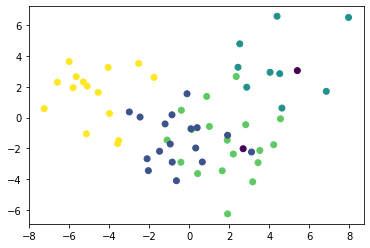

In [11]:
scopus_2019_life.cluster_scopus(target_column="Abstract", num_clusters=5)

c1?: c2:Robotics c3:? c4:ML c5:?

	Command set: SELECT `idx`, `videoId`, `idx_paper`, `publishedAt` FROM `scopus_videos_2019_comp`
	sql: SELECT `idx`, `videoId`, `idx_paper`, `publishedAt` FROM `scopus_videos_2019_comp`;
# Total DOIs: 14330	# DOIs w/ videos: 61	Ratio: 0.004
# Total videos: 79	# Target videos: 77	Ratio: 0.975
# Total subjects: 46	# subjects w/ videos: 22	Ratio: 0.478
# Total journals: 133	# journals w/ videos: 36	Ratio: 0.271
# Total elements in plot: 61
Cluster 1(N=2)
['A manifesto for future generation cloud computing: Research directions for the next decade', 'Will TCP Work in mmWave 5G Cellular Networks?']

Cluster 2(N=17)
['EncoderMap: Dimensionality Reduction and Generation of Molecule Conformations', 'Audio-Material Reconstruction for Virtualized Reality Using a Probabilistic Damping Model', 'Can atlas-based auto-segmentation ever be perfect? Insights from extreme value theory', 'SGaze: A Data-Driven Eye-Head Coordination Model for Realtime Gaze Prediction', 'FermiSurfer: Fermi-surface viewer pro

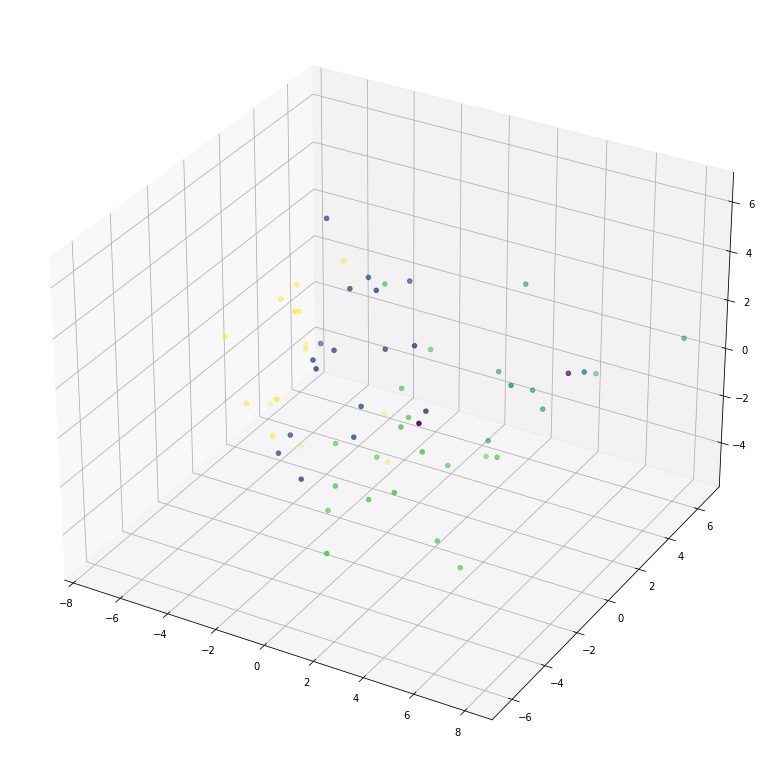

In [12]:
scopus_2019_life.cluster_scopus(target_column="Abstract", train_kmeans=False, pca_components=3)

In [13]:
scopus_2019_life.desc_clusters(scopus_2019_life.clustered_subjects)

Cluster 1(N=2)
['General Computer Science', 'Electrical and Electronic Engineering']

Cluster 2(N=17)
['Physical and Theoretical Chemistry', 'Signal Processing', 'Software', 'Signal Processing', 'Hardware and Architecture', 'General Computer Science', 'Signal Processing', 'Information Systems', 'Physical and Theoretical Chemistry', 'Computer Science Applications', 'Computers in Earth Sciences', 'General Engineering', 'Cognitive Neuroscience', 'Information Systems and Management', 'Computer Networks and Communications', 'Computer Vision and Pattern Recognition', 'Applied Mathematics']

Cluster 3(N=9)
['Arts and Humanities (miscellaneous)', 'Arts and Humanities (miscellaneous)', 'Information Systems', 'General Computer Science', 'Arts and Humanities (miscellaneous)', 'Arts and Humanities (miscellaneous)', 'Cellular and Molecular Neuroscience', 'Information Systems', 'Cellular and Molecular Neuroscience']

Cluster 4(N=18)
['Artificial Intelligence', 'Cellular and Molecular Neuroscience', 

	Command set: SELECT `idx`, `videoId`, `idx_paper`, `publishedAt` FROM `scopus_videos_2019_comp`
	sql: SELECT `idx`, `videoId`, `idx_paper`, `publishedAt` FROM `scopus_videos_2019_comp`;
# Total DOIs: 14330	# DOIs w/ videos: 61	Ratio: 0.004
# Total videos: 79	# Target videos: 77	Ratio: 0.975
# Total subjects: 46	# subjects w/ videos: 22	Ratio: 0.478
# Total journals: 133	# journals w/ videos: 36	Ratio: 0.271
# Total elements in plot: 61
Cluster 1(N=8)
['An Evaluation of Depth and Size Perception on a Spherical Fish Tank Virtual Reality Display', 'A distributed, plug-n-play algorithm for multi-robot applications with a priori non-computable objective functions', 'TrackerBots: Autonomous unmanned aerial vehicle for real-time localization and tracking of multiple radio-tagged animals', 'BIM-Tracker: A model-based visual tracking approach for indoor localisation using a 3D building model', 'Real-Time Robotic Manipulation of Cylindrical Objects in Dynamic Scenarios Through Elliptic Shape Pr

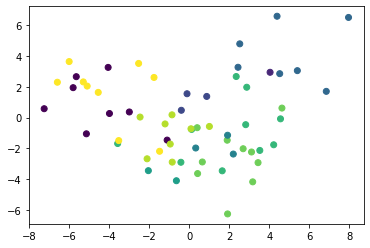

In [14]:
scopus_2019_life.cluster_scopus(num_clusters=10)

In [15]:
scopus_2019_life.desc_clusters(scopus_2019_life.clustered_subjects)

Cluster 1(N=8)
['Signal Processing', 'Modeling and Simulation', 'Computer Science Applications', 'Computers in Earth Sciences', 'Computer Science Applications', 'Modeling and Simulation', 'Software', 'Electrical and Electronic Engineering']

Cluster 2(N=1)
['Arts and Humanities (miscellaneous)']

Cluster 3(N=3)
['Artificial Intelligence', 'Information Systems', 'Computer Science Applications']

Cluster 4(N=7)
['Arts and Humanities (miscellaneous)', 'Arts and Humanities (miscellaneous)', 'General Computer Science', 'General Computer Science', 'Arts and Humanities (miscellaneous)', 'Cellular and Molecular Neuroscience', 'Information Systems']

Cluster 5(N=3)
['General Physics and Astronomy', 'Information Systems and Management', 'Computer Vision and Pattern Recognition']

Cluster 6(N=2)
['Software', 'Information Systems']

Cluster 7(N=10)
['Cellular and Molecular Neuroscience', 'Cellular and Molecular Neuroscience', 'Human-Computer Interaction', 'Signal Processing', 'Signal Processing', 

전체를 클러스터링

[+]Assigning new embedder instance.
	Command set: SELECT `idx`, `videoId`, `idx_paper`, `publishedAt` FROM `scopus_videos_2019_comp`
	sql: SELECT `idx`, `videoId`, `idx_paper`, `publishedAt` FROM `scopus_videos_2019_comp`;
# Total DOIs: 14330	# DOIs w/ videos: 61	Ratio: 0.004
# Total videos: 79	# Target videos: 77	Ratio: 0.975
# Total subjects: 46	# subjects w/ videos: 22	Ratio: 0.478
# Total journals: 133	# journals w/ videos: 36	Ratio: 0.271
# Total elements in plot: 14091
Cluster 1(N=110)
['Incorporating Wind Energy in Power System Restoration Planning', 'Coordinated Optimal Network Reconfiguration and Voltage Regulator/DER Control for Unbalanced Distribution Systems', 'Automotive Traction Inverters: Current Status and Future Trends', 'Slope-Weighted Energy-Based Rapid Control Analysis for Hybrid Electric Vehicles', 'An adaptive fuzzy logic control strategy for performance enhancement of a grid-connected PMSG-Based wind turbine', 'LSTM-EFG for wind power forecasting based on sequent

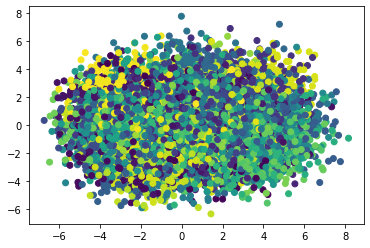

In [3]:
scopus_2019_life.cluster_scopus(num_clusters=100, videos_only=False)

In [5]:
scopus_2019_life.desc_clusters(scopus_2019_life.clustered_subjects)

Cluster 1(N=110)
['General Computer Science', 'General Computer Science', 'Aerospace Engineering', 'Aerospace Engineering', 'Information Systems', 'Computer Networks and Communications', 'Software', 'General Computer Science', 'General Mathematics', 'General Computer Science', 'Civil and Structural Engineering', 'General Computer Science', 'Artificial Intelligence', 'General Mathematics', 'Computer Science Applications', 'Numerical Analysis', 'General Computer Science', 'Civil and Structural Engineering', 'General Computer Science', 'Electrical and Electronic Engineering', 'Computer Science Applications', 'General Mathematics', 'Information Systems and Management', 'General Computer Science', 'Computational Theory and Mathematics', 'Information Systems', 'General Computer Science', 'General Computer Science', 'Electrical and Electronic Engineering', 'General Computer Science', 'General Engineering', 'Computers in Earth Sciences', 'Aerospace Engineering', 'General Computer Science', 'In

In [15]:
for _i, _cluster in enumerate(scopus_2019_life.clustered_subjects):
    print("Cluster", _i + 1)
    _max_subject = ""
    _max_count = 0
    for _subject in set(_cluster):
        if _cluster.count(_subject) > _max_count:
            _max_count = _cluster.count(_subject)
            _max_subject = _subject
#         print("\t%s\t%d" % (_subject, _cluster.count(_subject)))
    print("\t%s\t%d" % (_max_subject, _max_count))

Cluster 1
	General Computer Science	34
Cluster 2
	Computer Science Applications	22
Cluster 3
	Computer Science Applications	14
Cluster 4
	Electrical and Electronic Engineering	83
Cluster 5
	Computer Science Applications	20
Cluster 6
	Computer Science Applications	88
Cluster 7
	Electrical and Electronic Engineering	39
Cluster 8
	Computer Science Applications	22
Cluster 9
	Computer Science Applications	38
Cluster 10
	Biochemistry	70
Cluster 11
	Computer Science Applications	27
Cluster 12
	Computer Science Applications	42
Cluster 13
	Artificial Intelligence	34
Cluster 14
	Software	32
Cluster 15
	Computer Science Applications	71
Cluster 16
	Computational Theory and Mathematics	27
Cluster 17
	General Computer Science	61
Cluster 18
	Computer Science Applications	26
Cluster 19
	Software	18
Cluster 20
	Civil and Structural Engineering	27
Cluster 21
	Computer Science Applications	54
Cluster 22
	Software	46
Cluster 23
	Biochemistry	64
Cluster 24
	Control and Systems Engineering	36
Cluster 25
	Co

In [25]:
for _i, _cluster in enumerate(scopus_2019_life.clustered_subjects):
    print("Cluster", _i + 1)
    for _subject in set(_cluster):
        print("\t%s\t%d" % (_subject, _cluster.count(_subject)))

Cluster 1
	Artificial Intelligence	2
	Mechanical Engineering	1
	Information Systems and Management	3
	Numerical Analysis	3
	Computer Science Applications	7
	Computers in Earth Sciences	1
	General Mathematics	4
	Computational Theory and Mathematics	1
	Software	3
	Electrical and Electronic Engineering	7
	General Earth and Planetary Sciences	1
	Applied Mathematics	4
	Civil and Structural Engineering	12
	General Computer Science	34
	Aerospace Engineering	9
	Computer Networks and Communications	1
	General Engineering	1
	Information Systems	16
Cluster 2
	Cellular and Molecular Neuroscience	4
	nan	3
	Computer Science Applications	22
	Safety, Risk, Reliability and Quality	2
	Human-Computer Interaction	5
	Biochemistry	8
	Computer Networks and Communications	2
	Information Systems	9
	Artificial Intelligence	22
	Ecological Modeling	3
	Mechanical Engineering	1
	Cognitive Neuroscience	1
	Signal Processing	12
	Control and Systems Engineering	3
	Electrical and Electronic Engineering	9
	Hardware and A

In [27]:
_set_titles = set(scopus_2019_life.df_scopus[scopus_2019_life.df_scopus["DOI"].isin(scopus_2019_life.idx_papers)]["Title"])
for _i, _cluster in enumerate(scopus_2019_life.clustered_subjects):
    print("Cluster", _i + 1)
    _max_subject = ""
    _max_count = 0
    for _subject in set(_cluster):
        if _cluster.count(_subject) > _max_count:
            _max_count = _cluster.count(_subject)
            _max_subject = _subject
#         print("\t%s\t%d" % (_subject, _cluster.count(_subject)))
    print("\t%s\t%d" % (_max_subject, _max_count))
    _intersection = set(scopus_2019_life.clustered_titles[_i]).intersection(_set_titles)
    print("\t# intersection: %d" % len(_intersection))
    if len(_intersection):
        print("\t\t", _intersection)

Cluster 1
	General Computer Science	34
	# intersection: 0
Cluster 2
	Computer Science Applications	22
	# intersection: 0
Cluster 3
	Computer Science Applications	14
	# intersection: 1
		 {'An Evaluation of Depth and Size Perception on a Spherical Fish Tank Virtual Reality Display'}
Cluster 4
	Electrical and Electronic Engineering	83
	# intersection: 0
Cluster 5
	Computer Science Applications	20
	# intersection: 1
		 {'Smartphones reduce smiles between strangers'}
Cluster 6
	Computer Science Applications	88
	# intersection: 0
Cluster 7
	Electrical and Electronic Engineering	39
	# intersection: 1
		 {'Audio-Material Reconstruction for Virtualized Reality Using a Probabilistic Damping Model'}
Cluster 8
	Computer Science Applications	22
	# intersection: 0
Cluster 9
	Computer Science Applications	38
	# intersection: 1
		 {'AGRA: AI-augmented geographic routing approach for IoT-based incident-supporting applications'}
Cluster 10
	Biochemistry	70
	# intersection: 1
		 {'Pattern recognition an

	Command set: SELECT `idx`, `videoId`, `idx_paper`, `publishedAt` FROM `scopus_videos_2014_comp`
	sql: SELECT `idx`, `videoId`, `idx_paper`, `publishedAt` FROM `scopus_videos_2014_comp`;
# Total DOIs: 9336	# DOIs w/ videos: 96	Ratio: 0.010
# Total videos: 143	# Target videos: 138	Ratio: 0.965
# Total subjects: 43	# subjects w/ videos: 24	Ratio: 0.558
# Total journals: 133	# journals w/ videos: 35	Ratio: 0.263
# Total elements in plot: 8957
Cluster 1(N=119)
['Data-driven modeling reconciles kinetics of ERK phosphorylation, localization, and activity states', 'Spatial regulation dominates gene function in the ganglia chain', 'Induction of Wnt-Inducible Signaling Protein-1 Correlates with Invasive Breast Cancer Oncogenesis and Reduced Type 1 Cell-Mediated Cytotoxic Immunity: A Retrospective Study', 'In silico site of metabolism prediction for human UGT-catalyzed reactions', 'Genes related to differentiation are correlated with the gene regulatory network structure', 'A hierarchical statis

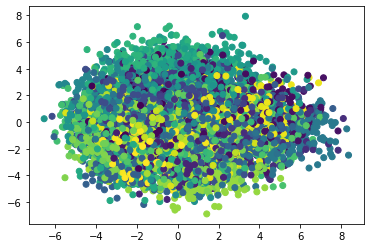

In [30]:
scopus_2014_comp.cluster_scopus(num_clusters=70, videos_only=False)

In [31]:
_set_titles = set(scopus_2014_comp.df_scopus[scopus_2014_comp.df_scopus["DOI"].isin(scopus_2014_comp.idx_papers)]["Title"])
for _i, _cluster in enumerate(scopus_2014_comp.clustered_subjects):
    print("Cluster", _i + 1)
    _max_subject = ""
    _max_count = 0
    for _subject in set(_cluster):
        if _cluster.count(_subject) > _max_count:
            _max_count = _cluster.count(_subject)
            _max_subject = _subject
#         print("\t%s\t%d" % (_subject, _cluster.count(_subject)))
    print("\t%s\t%d" % (_max_subject, _max_count))
    _intersection = set(scopus_2014_comp.clustered_titles[_i]).intersection(_set_titles)
    print("\t# intersection: %d" % len(_intersection))
    if len(_intersection):
        print("\t\t", _intersection)

Cluster 1
	Library and Information Sciences	32
	# intersection: 0
Cluster 2
	Artificial Intelligence	39
	# intersection: 0
Cluster 3
	Computer Science Applications	26
	# intersection: 2
		 {'Mining probabilistically frequent sequential patterns in large uncertain databases', 'Data mining with big data'}
Cluster 4
	Library and Information Sciences	21
	# intersection: 0
Cluster 5
	General Computer Science	67
	# intersection: 0
Cluster 6
	Computational Mathematics	25
	# intersection: 0
Cluster 7
	Computer Vision and Pattern Recognition	25
	# intersection: 1
		 {'Image quality assessment for fake biometric detection: Application to Iris, fingerprint, and face recognition'}
Cluster 8
	Electrical and Electronic Engineering	44
	# intersection: 1
		 {'A scalable and modular architecture for high-performance packet classification'}
Cluster 9
	Electrical and Electronic Engineering	44
	# intersection: 2
		 {'Efficient data collection for large-scale mobile monitoring applications', 'Energy-saving

비디오 논문이 특히 밀집되게 하는 클러스터 수는?

	Command set: SELECT `idx`, `videoId`, `idx_paper`, `publishedAt` FROM `scopus_videos_2014_comp`
	sql: SELECT `idx`, `videoId`, `idx_paper`, `publishedAt` FROM `scopus_videos_2014_comp`;
# Total DOIs: 9336	# DOIs w/ videos: 96	Ratio: 0.010
# Total videos: 143	# Target videos: 138	Ratio: 0.965
# Total subjects: 43	# subjects w/ videos: 24	Ratio: 0.558
# Total journals: 133	# journals w/ videos: 35	Ratio: 0.263
# Total elements in plot: 8957
Cluster 1(N=167)
['ReDS: A framework for reputation-enhanced DHTs', 'Secret sharing with multi-cover adaptive steganography', 'Probe and adapt: Rate adaptation for HTTP video streaming at scale', 'Preserving location privacy in geosocial applications', 'Digital image sharing by diverse image media', 'EPASS: An expressive attribute-based signature scheme with privacy and an unforgeability guarantee for the Internet of Things', 'A new interactive hashing theorem', 'SybilBelief: A semi-supervised learning approach for structure-based sybil detection', '

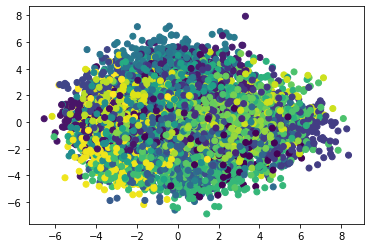

In [32]:
scopus_2014_comp.cluster_scopus(num_clusters=40, videos_only=False)

In [33]:
_set_titles = set(scopus_2014_comp.df_scopus[scopus_2014_comp.df_scopus["DOI"].isin(scopus_2014_comp.idx_papers)]["Title"])
for _i, _cluster in enumerate(scopus_2014_comp.clustered_subjects):
    print("Cluster", _i + 1)
    _max_subject = ""
    _max_count = 0
    for _subject in set(_cluster):
        if _cluster.count(_subject) > _max_count:
            _max_count = _cluster.count(_subject)
            _max_subject = _subject
#         print("\t%s\t%d" % (_subject, _cluster.count(_subject)))
    print("\t%s\t%d" % (_max_subject, _max_count))
    _intersection = set(scopus_2014_comp.clustered_titles[_i]).intersection(_set_titles)
    print("\t# intersection: %d" % len(_intersection))
    if len(_intersection):
        print("\t\t", _intersection)

Cluster 1
	Safety, Risk, Reliability and Quality	29
	# intersection: 3
		 {'Digital image sharing by diverse image media', 'Secure deduplication with efficient and reliable convergent key management', 'Secure mining of association rules in horizontally distributed databases'}
Cluster 2
	General Physics and Astronomy	39
	# intersection: 0
Cluster 3
	Applied Mathematics	67
	# intersection: 0
Cluster 4
	Computational Mathematics	36
	# intersection: 2
		 {'Design of a RESTful web information system for drug prescription and administration', 'Myxococcus xanthus Gliding Motors Are Elastically Coupled to the Substrate as Predicted by the Focal Adhesion Model of Gliding Motility'}
Cluster 5
	Genetics	24
	# intersection: 2
		 {'Class-specific multiple classifiers scheme to recognize emotions from speech signals', 'Audibilization: Data analysis by ear'}
Cluster 6
	Computer Science Applications	36
	# intersection: 3
		 {'Consequences of Converting Graded to Action Potentials upon Neural Informati

	Command set: SELECT `idx`, `videoId`, `idx_paper`, `publishedAt` FROM `scopus_videos_2014_comp`
	sql: SELECT `idx`, `videoId`, `idx_paper`, `publishedAt` FROM `scopus_videos_2014_comp`;
# Total DOIs: 9336	# DOIs w/ videos: 96	Ratio: 0.010
# Total videos: 143	# Target videos: 138	Ratio: 0.965
# Total subjects: 43	# subjects w/ videos: 24	Ratio: 0.558
# Total journals: 133	# journals w/ videos: 35	Ratio: 0.263
# Total elements in plot: 8957
Cluster 1(N=544)
['Spectral numerical schemes for time-dependent convection with viscosity dependent on temperature', 'CORSIKA implementation of heavy quark production and propagation in extensive air showers', 'An empirical investigation of V-I trajectory based load signatures for non-intrusive load monitoring', 'Numerical calculation of the runaway electron distribution function and associated synchrotron emission', 'Electronic transport of a large scale system studied by renormalized transfer matrix method: Application to armchair graphene nanorib

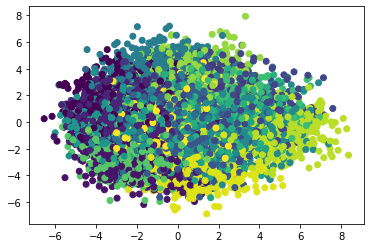

In [34]:
scopus_2014_comp.cluster_scopus(num_clusters=20, videos_only=False)

In [35]:
_set_titles = set(scopus_2014_comp.df_scopus[scopus_2014_comp.df_scopus["DOI"].isin(scopus_2014_comp.idx_papers)]["Title"])
for _i, _cluster in enumerate(scopus_2014_comp.clustered_subjects):
    print("Cluster", _i + 1)
    _max_subject = ""
    _max_count = 0
    for _subject in set(_cluster):
        if _cluster.count(_subject) > _max_count:
            _max_count = _cluster.count(_subject)
            _max_subject = _subject
#         print("\t%s\t%d" % (_subject, _cluster.count(_subject)))
    print("\t%s\t%d" % (_max_subject, _max_count))
    _intersection = set(scopus_2014_comp.clustered_titles[_i]).intersection(_set_titles)
    print("\t# intersection: %d" % len(_intersection))
    if len(_intersection):
        print("\t\t", _intersection)

Cluster 1
	Physical and Theoretical Chemistry	152
	# intersection: 2
		 {'Lipid14: The amber lipid force field', 'A nanorobotic system for in situ stiffness measurements on membranes'}
Cluster 2
	Electrical and Electronic Engineering	182
	# intersection: 0
Cluster 3
	Computer Science Applications	108
	# intersection: 6
		 {'A markov random field groupwise registration framework for face recognition', 'Spatial-temporal enhancement of ACO-based selection schemes for adaptive routing in network-on-chip systems', 'Modeling of batch processes using explicitly time-dependent artificial neural networks', 'Developing an assessment-centered e-Learning system for improving student learning effectiveness', 'Random projection random discretization ensembles - Ensembles of linear multivariate decision trees', 'A probabilistic approach to string transformation'}
Cluster 4
	Computer Science Applications	84
	# intersection: 2
		 {'Automatic handling of tissue microarray cores in high-dimensional micro

	Command set: SELECT `idx`, `videoId`, `idx_paper`, `publishedAt` FROM `scopus_videos_2014_comp`
	sql: SELECT `idx`, `videoId`, `idx_paper`, `publishedAt` FROM `scopus_videos_2014_comp`;
# Total DOIs: 9336	# DOIs w/ videos: 96	Ratio: 0.010
# Total videos: 143	# Target videos: 138	Ratio: 0.965
# Total subjects: 43	# subjects w/ videos: 24	Ratio: 0.558
# Total journals: 133	# journals w/ videos: 35	Ratio: 0.263
# Total elements in plot: 8957
Cluster 1(N=636)
['Two-way networks: When adaptation is useless', 'TVR - Tall vehicle relayingin vehicular networks', 'Joint routing and resource allocation for delay minimization in cognitive radio based mesh networks', 'Rough sets, kernel set, and spatiotemporal outlier detection', 'Curve-based planar graph routing with guaranteed delivery in multihop wireless networks', 'Managing interference correlation through random medium access', 'Optimized backhaul compression for uplink cloud radio access network', 'Probe and adapt: Rate adaptation for HTTP

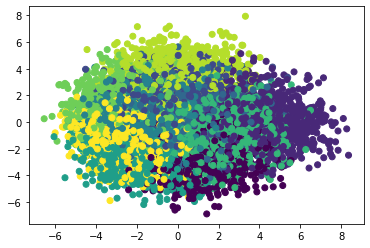

In [36]:
scopus_2014_comp.cluster_scopus(num_clusters=10, videos_only=False)

In [37]:
_set_titles = set(scopus_2014_comp.df_scopus[scopus_2014_comp.df_scopus["DOI"].isin(scopus_2014_comp.idx_papers)]["Title"])
for _i, _cluster in enumerate(scopus_2014_comp.clustered_subjects):
    print("Cluster", _i + 1)
    _max_subject = ""
    _max_count = 0
    for _subject in set(_cluster):
        if _cluster.count(_subject) > _max_count:
            _max_count = _cluster.count(_subject)
            _max_subject = _subject
#         print("\t%s\t%d" % (_subject, _cluster.count(_subject)))
    print("\t%s\t%d" % (_max_subject, _max_count))
    _intersection = set(scopus_2014_comp.clustered_titles[_i]).intersection(_set_titles)
    print("\t# intersection: %d" % len(_intersection))
    if len(_intersection):
        print("\t\t", _intersection)

Cluster 1
	Electrical and Electronic Engineering	154
	# intersection: 4
		 {'A scalable and modular architecture for high-performance packet classification', 'Adaptive and online data anomaly detection for wireless sensor systems', 'Energy-saving analysis in cellular-WLAN cooperative scenarios', 'Efficient data collection for large-scale mobile monitoring applications'}
Cluster 2
	Human-Computer Interaction	222
	# intersection: 20
		 {'Twitter versus Facebook: Exploring the role of narcissism in the motives and usage of different social media platforms', 'Effective and efficient clustering methods for correlated probabilistic graphs', 'Analyzing implicit social networks in multiplayer online games', 'Detecting people looking at each other in videos', 'Commitments to regulate social web services operation', 'The interplay between immersion and appeal in video games', 'Digital image sharing by diverse image media', 'CCIoT-CMfg: Cloud computing and internet of things-based cloud manufactu

In [1]:
from transformers import *

tokenizer = AutoTokenizer.from_pretrained('allenai/scibert_scivocab_uncased')
model = AutoModel.from_pretrained('allenai/scibert_scivocab_uncased')

/home/hweem/git/s-transformers/lib/python3.7/site-packages/torch/cuda/__init__.py:52: UserWarning: CUDA initialization: The NVIDIA driver on your system is too old (found version 10010). Please update your GPU driver by downloading and installing a new version from the URL: http://www.nvidia.com/Download/index.aspx Alternatively, go to: https://pytorch.org to install a PyTorch version that has been compiled with your version of the CUDA driver. (Triggered internally at  /pytorch/c10/cuda/CUDAFunctions.cpp:100.)
  return torch._C._cuda_getDeviceCount() > 0


In [8]:
inputs = tokenizer("Hello world!", return_tensors="pt")
inputs

{'input_ids': tensor([[  102, 29423, 30112,  2399,  3190,   103]]), 'token_type_ids': tensor([[0, 0, 0, 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1]])}

In [11]:
outputs = model(**inputs)
outputs[1].size()

torch.Size([1, 768])

In [1]:
from sklearn.feature_extraction.text import CountVectorizer

doc = """
         Supervised learning is the machine learning task of 
         learning a function that maps an input to an output based 
         on example input-output pairs.[1] It infers a function 
         from labeled training data consisting of a set of 
         training examples.[2] In supervised learning, each 
         example is a pair consisting of an input object 
         (typically a vector) and a desired output value (also 
         called the supervisory signal). A supervised learning 
         algorithm analyzes the training data and produces an 
         inferred function, which can be used for mapping new 
         examples. An optimal scenario will allow for the algorithm 
         to correctly determine the class labels for unseen 
         instances. This requires the learning algorithm to  
         generalize from the training data to unseen situations 
         in a 'reasonable' way (see inductive bias).
      """

n_gram_range = (1, 1)
stop_words = "english"

# Extract candidate words/phrases
count = CountVectorizer(ngram_range=n_gram_range, stop_words=stop_words).fit([doc])
candidates = count.get_feature_names()

In [3]:
candidates

['algorithm',
 'allow',
 'analyzes',
 'based',
 'bias',
 'called',
 'class',
 'consisting',
 'correctly',
 'data',
 'desired',
 'determine',
 'example',
 'examples',
 'function',
 'generalize',
 'inductive',
 'inferred',
 'infers',
 'input',
 'instances',
 'labeled',
 'labels',
 'learning',
 'machine',
 'mapping',
 'maps',
 'new',
 'object',
 'optimal',
 'output',
 'pair',
 'pairs',
 'produces',
 'reasonable',
 'requires',
 'scenario',
 'set',
 'signal',
 'situations',
 'supervised',
 'supervisory',
 'task',
 'training',
 'typically',
 'unseen',
 'used',
 'value',
 'vector',
 'way']